In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv(r'C:\Users\ICA\Documents\advertising.csv', encoding='latin1')

In [5]:
print(df.head())
print(df.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [7]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


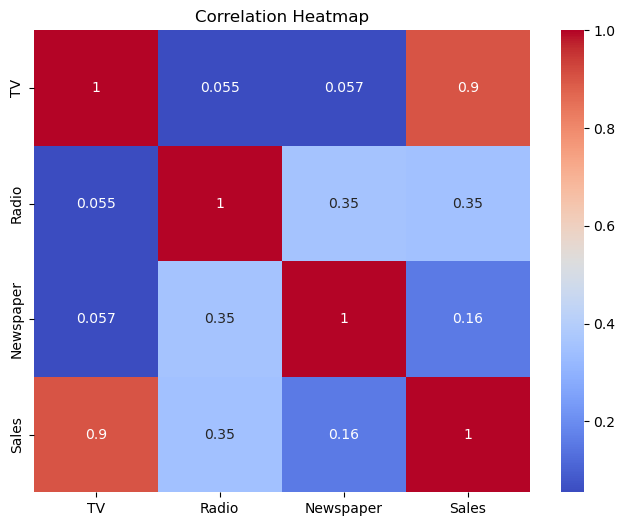

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

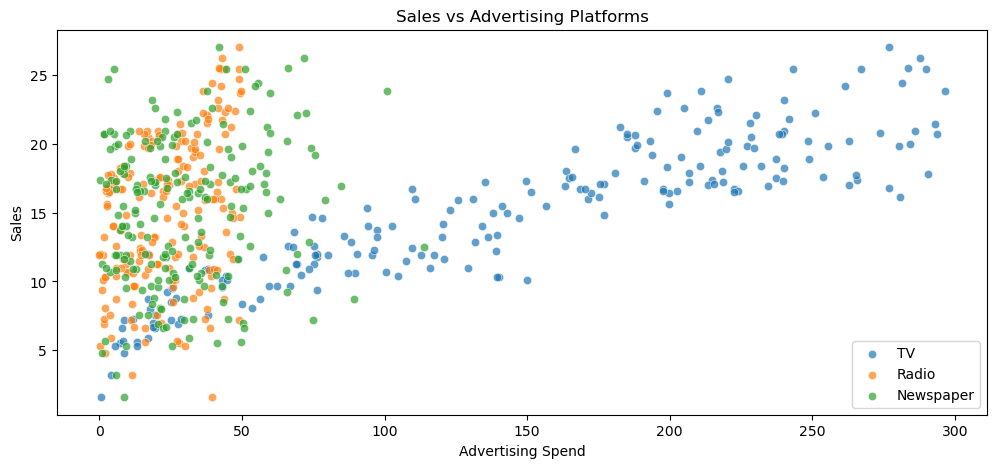

In [11]:
plt.figure(figsize=(12, 5))
for column in ['TV', 'Radio', 'Newspaper']:
    sns.scatterplot(data=df, x=column, y='Sales', label=column, alpha=0.7)
plt.title('Sales vs Advertising Platforms')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [13]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr_model.predict(X_test)
print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Results
MAE: 1.274826210954934
MSE: 2.907756910271091
R2 Score: 0.9059011844150826


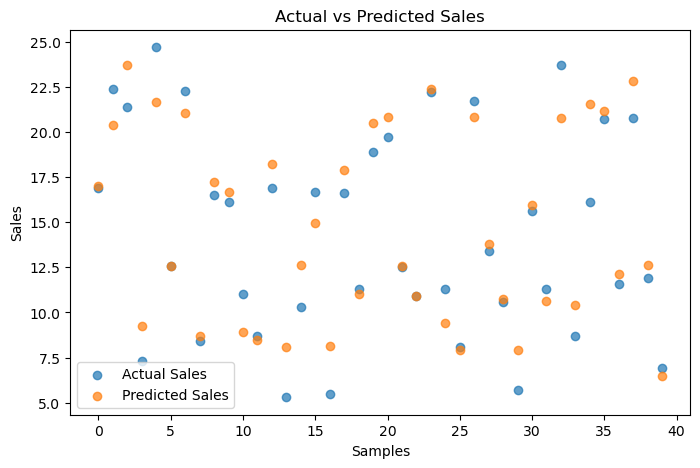

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, label='Actual Sales', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Sales', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.show()

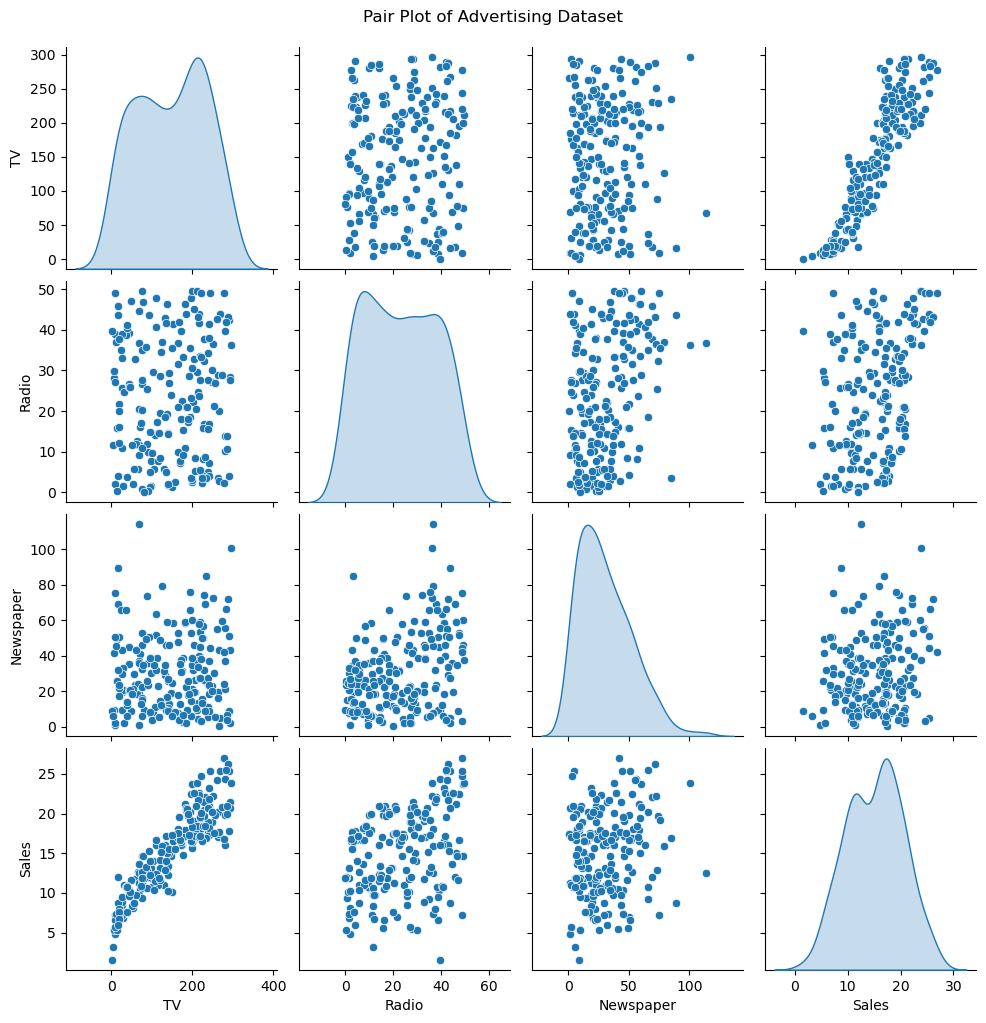

In [23]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Advertising Dataset", y=1.02)
plt.show()

In [25]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

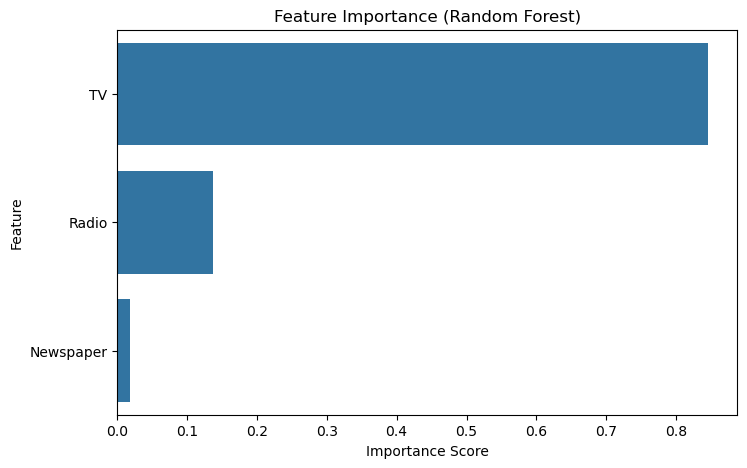

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [32]:
residuals = y_test - y_pred

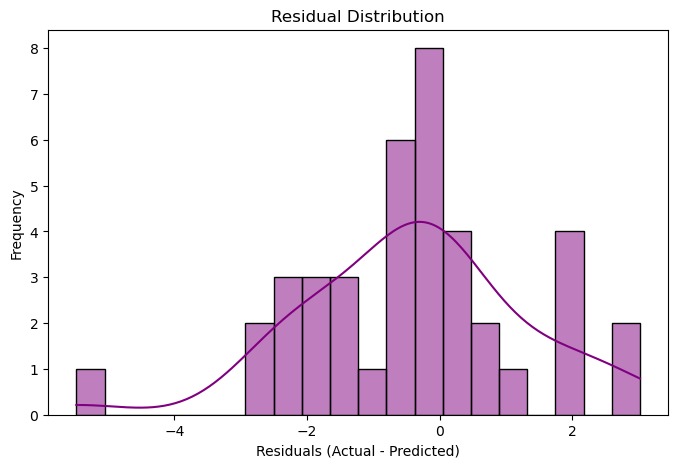

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title('Residual Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

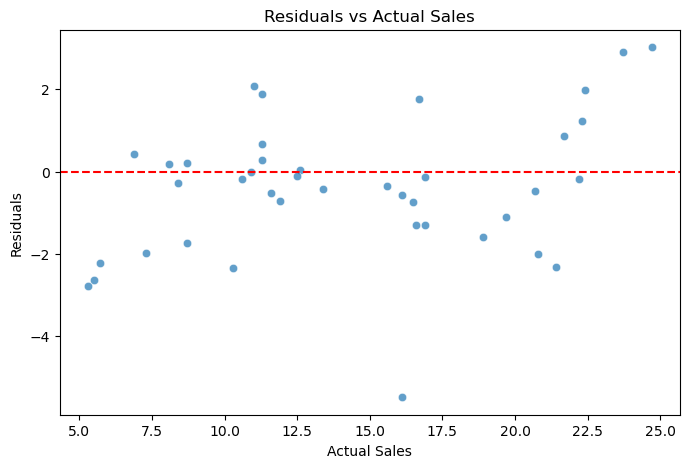

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.show()


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)

In [42]:
print("Gradient Boosting Results")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting Results
MAE: 0.830119958670547
MSE: 1.255260979893099
R2 Score: 0.9593781134039533


In [ ]:
elasticity = {}
for feature in X.columns:
    elasticity[feature] = (df[feature].std() / df['Sales'].std()) * rf_model.feature_importances_[X.columns.get_loc(feature)]

elasticity_df = pd.DataFrame(list(elasticity.items()), columns=['Feature', 'Elasticity']).sort_values(by='Elasticity', ascending=False)